In [1]:
import pandas as pd  # สำหรับจัดการข้อมูลแบบตาราง
from sklearn.model_selection import train_test_split  # แบ่งข้อมูล train/test
from sklearn.linear_model import LinearRegression  # โมเดล Linear Regression
from sklearn.metrics import mean_squared_error  # ประเมินผลด้วย MSE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt  # สำหรับ plot กราฟ

In [2]:
df = pd.read_csv('/data/notebook_files/coffee_shop_revenue.csv')

# **EDA** - Exploratory Data Analysis

In [3]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [5]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [6]:
df.isnull().sum()

Number_of_Customers_Per_Day 0
Average_Order_Value 0
Operating_Hours_Per_Day 0
Number_of_Employees 0
Marketing_Spend_Per_Day 0
Location_Foot_Traffic 0
Daily_Revenue 0
dtype: int64

# เตรียมข้อมูล
**กำหนด features (ตัวแปรอิสระ) และ target (ตัวแปรที่ทำนาย: Daily_Revenue)**

In [7]:
#1.กำหนด features และ target
features = [
    'Number_of_Customers_Per_Day', 
    'Average_Order_Value', 
    'Operating_Hours_Per_Day',
    'Number_of_Employees', 
    'Marketing_Spend_Per_Day', 
    'Location_Foot_Traffic'
]
target = 'Daily_Revenue'

# 2. สร้าง X และ y จากตัวแปร df

X = df[features]
y = df[target]

# 3. แบ่งข้อมูลเป็น Train (80%) และ Test (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. สร้าง Pipeline: ปรับสเกลข้อมูล + โมเดล Random Forest

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


# 5. เริ่มสอนโมเดล (Train)

pipeline.fit(X_train, y_train)


# 6. แสดงผลความแม่นยำ

score = pipeline.score(X_test, y_test)
print(f"R2 Score: {score:.4f}")

R2 Score: 0.9490


# ฝึก และประเมินโมเดล Linear Regression สำหรับทำนายรายได้ต่อวัน (Daily_Revenue) โดยใช้ข้อมูลเดียวกับที่เราเคยใช้กับ Random Forest ก่อนหน้านี้

In [8]:
model = LinearRegression()  # สร้างโมเดล
model.fit(X_train, y_train)  # ฝึกโมเดลด้วยข้อมูล train

# ทำนายและประเมินผล
y_pred = model.predict(X_test)  # ทำนายด้วย test set
mse = mean_squared_error(y_test, y_pred)  # คำนวณ error (MSE ยิ่งต่ำยิ่งดี)
print(f"\nMean Squared Error (MSE): {mse:.2f}")  # แสดงผล

# แสดง coefficient (น้ำหนักของแต่ละ feature)
print("\nCoefficients of each feature:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")


Mean Squared Error (MSE): 97569.72

Coefficients of each feature:
Number_of_Customers_Per_Day: 5.57
Average_Order_Value: 245.18
Operating_Hours_Per_Day: 0.27
Number_of_Employees: -1.77
Marketing_Spend_Per_Day: 1.54
Location_Foot_Traffic: 0.02


In [9]:
# สร้างตารางเปรียบเทียบค่า Feature และ Coefficient
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False) # เรียงลำดับจากมากไปน้อย
print(coef_df.to_string(index=False))

                    Feature  Coefficient
        Average_Order_Value   245.180947
Number_of_Customers_Per_Day     5.572657
    Marketing_Spend_Per_Day     1.536426
    Operating_Hours_Per_Day     0.267677
      Location_Foot_Traffic     0.017338
        Number_of_Employees    -1.773529


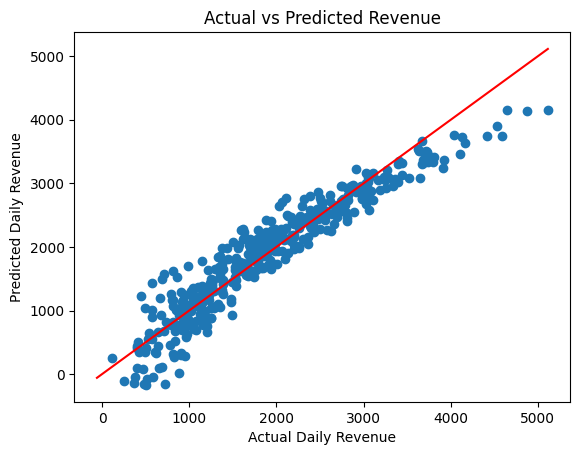

In [10]:
# Visualize ผล (เปรียบเทียบ actual vs predicted)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Revenue')
plt.ylabel('Predicted Daily Revenue')
plt.title('Actual vs Predicted Revenue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # เส้นอ้างอิง
plt.show()  # แสดงกราฟ (ถ้ารันใน Jupyter หรือ IDE ที่ support)

# ทดลองทำนายรายได้ต่อวัน (Daily_Revenue) จากข้อมูลใหม่ที่เราสมมติขึ้นเอง โดยใช้โมเดลที่ฝึกไว้แล้ว (ในที่นี้คือโมเดล Linear Regression จากโค้ดก่อนหน้า)

In [11]:
# ทำนายตัวอย่างใหม่ (สำหรับทดลอง)
new_data = pd.DataFrame({
    'Number_of_Customers_Per_Day': [200],
    'Average_Order_Value': [7.0],
    'Operating_Hours_Per_Day': [12],
    'Number_of_Employees': [5],
    'Marketing_Spend_Per_Day': [150.0],
    'Location_Foot_Traffic': [500]
})
predicted_revenue = model.predict(new_data)
print(f"\nPredicted Revenue สำหรับข้อมูลใหม่: {predicted_revenue[0]:.2f}")


Predicted Revenue สำหรับข้อมูลใหม่: 1528.76
